# Pima Project 

In [22]:
#The objective of this model is to diagnostically predict whether or
# not a patient had diabetes, based on certain diagnostic measurements included in the dataset(from Kaggle.com)

In [35]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

%matplotlib inline

df = pd.read_csv('diabetes.csv') #Loading the dataset into a pandas dataframe
df.head(10) #print the first 10 rows to take an overview.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [36]:
df.info() #print more information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


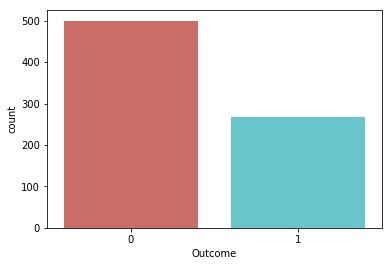

In [53]:
sb.countplot(x='Outcome',data=df, palette='hls')

In [29]:
# Now we will have to split the dataset into 70% training-dataset and 30% testing-dataset
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
features = df[columns].values
labels = df['Outcome'].values
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(x_train, y_train)

In [45]:
# the accuracy for x_train
accuracy_train = clf.score(x_train, y_train)
print 'the accuracy for training data is :', (accuracy_train*100)

the accuracy for training data is : 89.75791433891993


In [46]:
# the accuracy for x_train
accuracy_test = clf.score(x_test,y_test)
print 'the accuracy for testing data is :',(accuracy_test*100)

the accuracy for testing data is : 64.93506493506493


## Improve the accurcay using:
#### 1- classification report and confusion matrix  for the testing sample:

In [19]:
ypredict = clf.predict(x_test)
print '\nTraining classification report\n', classification_report(y_test, ypredict)
print "\n Confusion matrix of training \n", confusion_matrix(y_test, ypredict)


Training classification report
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       154
           1       0.63      0.61      0.62        77

   micro avg       0.75      0.75      0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231


 Confusion matrix of training 
[[126  28]
 [ 30  47]]


#### 2- Increase the RandomForestClassifier parameter(n_estimators)

In [48]:
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(x_train, y_train)
# the accuracy for x_train
accuracy_train = clf.score(x_train, y_train)
print 'the accuracy for training data is :', (accuracy_train*100)
# the accuracy for x_train
accuracy_test = clf.score(x_test,y_test)
print 'the accuracy for testing data is :',(accuracy_test*100)

the accuracy for training data is : 96.64804469273743
the accuracy for testing data is : 67.09956709956711


#### 3- min-max scaler

In [50]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
# apply same transformation to test data
x_test = scaler.transform(x_test)

clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(x_train, y_train)  

# the accuracy for x_train
accuracy_train = clf.score(x_train, y_train)
print 'the accuracy for training data is :', (accuracy_train*100)
# the accuracy for x_train
accuracy_test = clf.score(x_test,y_test)
print 'the accuracy for testing data is :',(accuracy_test*100)

the accuracy for training data is : 96.46182495344506
the accuracy for testing data is : 67.96536796536796


#### 4- standard scaler

In [51]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
# apply same transformation to test data
x_test = scaler.transform(x_test)

clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(x_train, y_train)  

# the accuracy for x_train
accuracy_train = clf.score(x_train, y_train)
print 'the accuracy for training data is :', (accuracy_train*100)
# the accuracy for x_train
accuracy_test = clf.score(x_test,y_test)
print 'the accuracy for testing data is :',(accuracy_test*100)

the accuracy for training data is : 96.8342644320298
the accuracy for testing data is : 72.2943722943723
